In [1]:
# make it nice and dark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from jupyterthemes import jtplot
jtplot.style()

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [2]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# haal uit
#tit_df = pd.read_csv("titanic.csv")
#df=test_df[['Name', 'Ticket', 'PassengerId']].rename(columns={'Name':'name', 'Ticket':'ticket'})
#pd.merge(df ,tit_df, on=['name', 'ticket'], how='inner')
# sort of test answers

([<matplotlib.axis.XTick at 0x1bdf250f668>,
 <a list of 3 Text xticklabel objects>)

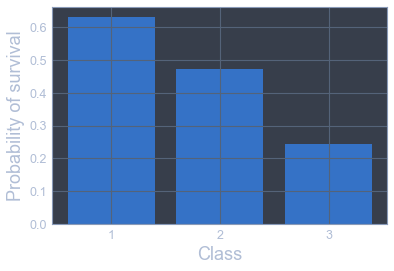

In [5]:
plt.bar(train_df['Pclass'].value_counts().sort_index().keys(), train_df['Pclass'][train_df['Survived']
                                                                                  == 1].value_counts().sort_index()/train_df['Pclass'].value_counts().sort_index())
plt.xlabel('Class', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)
plt.xticks(ticks=[1, 2, 3])

Text(0, 0.5, 'Probability of survival')

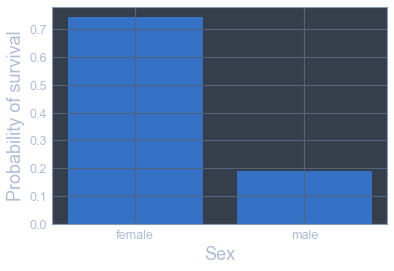

In [6]:
plt.bar(train_df['Sex'].value_counts().sort_index().keys(), train_df['Sex'][train_df['Survived']
                                                                            == 1].value_counts().sort_index()/train_df['Sex'].value_counts().sort_index())
plt.xlabel('Sex', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Text(0, 0.5, 'Probability of survival')

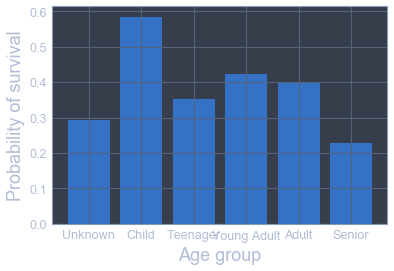

In [8]:
# analyse age bins
# check weer
train_df['AgeBins'] = train_df['Age'].fillna(-0.5)
test_df['AgeBins'] = test_df['Age'].fillna(-0.5)
bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_df['AgeBins'] = pd.cut(train_df['AgeBins'], bins, labels=labels)
test_df['AgeBins'] = pd.cut(test_df['AgeBins'], bins, labels=labels)
plt.bar(train_df['AgeBins'].value_counts().sort_index().keys(), train_df['AgeBins']
        [train_df['Survived'] == 1].value_counts().sort_index()/train_df['AgeBins'].value_counts().sort_index())
plt.xlabel('Age group', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)

Text(0, 0.5, 'Count')

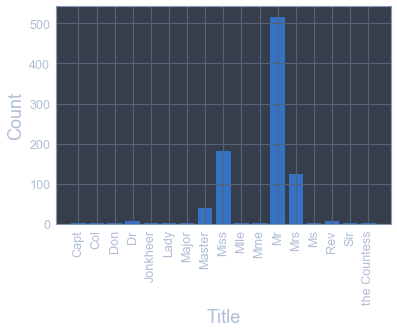

In [9]:
train_df_title = pd.Series(
    [i.split(',')[1].split('.')[0].strip() for i in train_df['Name']])
plt.bar(train_df_title.value_counts().sort_index().keys(),
        train_df_title.value_counts().sort_index())
plt.xticks(rotation=90)
plt.xlabel('Title', fontsize=18)
plt.ylabel('Count', fontsize=18)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Mme               1
Lady              1
the Countess      1
Jonkheer          1
Ms                1
Don               1
Sir               1
dtype: int64


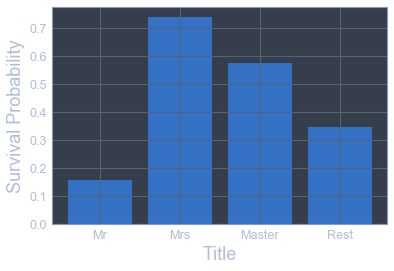

In [10]:
# Analyse Names
# get title
train_df_title = pd.Series(
    [i.split(',')[1].split('.')[0].strip() for i in train_df['Name']])
test_df_title = pd.Series(
    [i.split(',')[1].split('.')[0].strip() for i in test_df['Name']])
print(train_df_title.value_counts())
# reduce 17 titles to 4: Mr, Mrs, Master and Rest for use in models
train_df_title = train_df_title.replace(
    ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dona', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Don'], 'Rest')
train_df_title = train_df_title.replace(
    ['Miss', 'Mrs', 'Mlle', 'Ms', 'Mme'], 'Mrs')
test_df_title = test_df_title.replace(
    ['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dona', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Don'], 'Rest')
test_df_title = test_df_title.replace(
    ['Miss', 'Mrs', 'Mlle', 'Ms', 'Mme'], 'Mrs')
# survival rate agrees with "women and children first" policy depicted in the film
plt.bar(train_df_title.value_counts().keys(), train_df_title[train_df['Survived'] == 1].value_counts(
).reindex(train_df_title.value_counts().keys())/train_df_title.value_counts())
plt.xlabel('Title', fontsize=18)
plt.ylabel('Survival Probability', fontsize=18)
# add titles to train_df
train_df = pd.concat([train_df, pd.DataFrame(
    train_df_title, columns=['Title'])], axis=1)
test_df = pd.concat([test_df, pd.DataFrame(
    test_df_title, columns=['Title'])], axis=1)

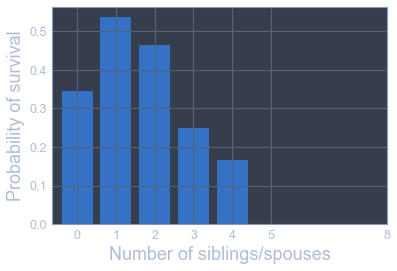

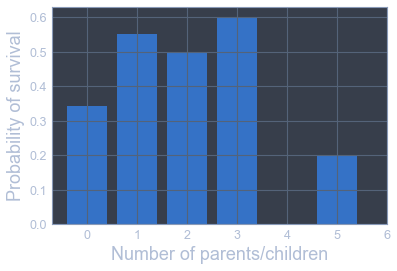

In [11]:
plt.figure()
plt.bar(train_df['SibSp'].value_counts().sort_index().keys(), train_df['SibSp'][train_df['Survived']
                                                                                == 1].value_counts().sort_index()/train_df['SibSp'].value_counts().sort_index())
plt.xlabel('Number of siblings/spouses', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)
plt.xticks(train_df['SibSp'].value_counts().sort_index().keys())
plt.figure()
plt.bar(train_df['Parch'].value_counts().sort_index().keys(), train_df['Parch'][train_df['Survived']
                                                                                == 1].value_counts().sort_index()/train_df['Parch'].value_counts().sort_index())
plt.xlabel('Number of parents/children', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)
plt.xticks(train_df['Parch'].value_counts().sort_index().keys())

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Fsize, dtype: int64


C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A

Text(0, 0.5, 'Probability of survival')

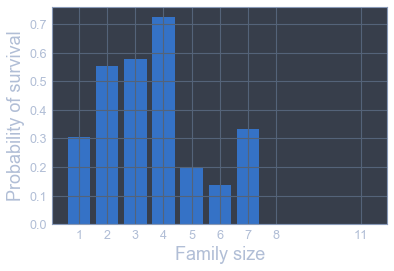

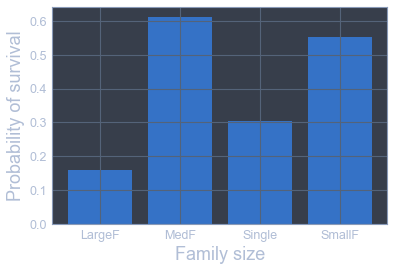

In [12]:
# family size
# add column for family size (+1 for passenger)
train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1
survived = pd.Series(
    train_df['Fsize'][train_df['Survived'] == 1].value_counts().sort_index())
tot = pd.Series(train_df['Fsize'].value_counts().sort_index())

test_df['Fsize'] = test_df['SibSp'] + test_df['Parch'] + 1
# family size count
print(tot)
# add missing indices
survived = survived.combine(tot, lambda x1, x2: x1 if x1 < x2 else 0)
plt.figure()
plt.bar(tot.keys(), survived/tot)
plt.xlabel('Family size', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)
plt.xticks(tot.keys())
# smaller families have higher chance of survival
# create family size bins singleF, smalF, medF, largeF
train_df['Fbin'] = train_df['SibSp']  # dummy var to init
train_df['Fbin'][train_df['Fsize'] == 1] = train_df['Fsize'].map(
    lambda s: 'Single' if s == 1 else s)
train_df['Fbin'][train_df['Fsize'] == 2] = train_df['Fsize'].map(
    lambda s: 'SmallF' if s == 2 else s)
train_df['Fbin'][(train_df['Fsize'] <= 4) & (train_df['Fsize'] >= 3)
                 ] = train_df['Fsize'].map(lambda s: 'MedF' if 3 <= s <= 4 else s)
train_df['Fbin'][train_df['Fsize'] >= 5] = train_df['Fsize'].map(
    lambda s: 'LargeF' if s >= 5 else s)

test_df['Fbin'] = test_df['SibSp']  # dummy var to init
test_df['Fbin'][test_df['Fsize'] == 1] = test_df['Fsize'].map(
    lambda s: 'Single' if s == 1 else s)
test_df['Fbin'][test_df['Fsize'] == 2] = test_df['Fsize'].map(
    lambda s: 'SmallF' if s == 2 else s)
test_df['Fbin'][(test_df['Fsize'] <= 4) & (test_df['Fsize'] >= 3)
                ] = test_df['Fsize'].map(lambda s: 'MedF' if 3 <= s <= 4 else s)
test_df['Fbin'][test_df['Fsize'] >= 5] = test_df['Fsize'].map(
    lambda s: 'LargeF' if s >= 5 else s)
plt.figure()
# small and medium families have bigger chance of survival
plt.bar(train_df['Fbin'].value_counts().sort_index().keys(), train_df['Fbin'][train_df['Survived']
                                                                              == 1].value_counts().sort_index()/train_df['Fbin'].value_counts().sort_index())
plt.xlabel('Family size', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)

Text(0, 0.5, 'Probability of survival')

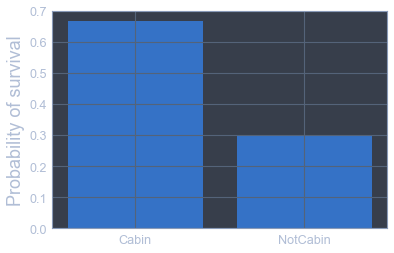

In [13]:
# cabin, only 204 non-null objects from info()
# might be uselful to distiguish between cabin and non-cabin
train_df['Cabin'] = pd.Series(['Cabin' if not pd.isnull(
    i) else 'NotCabin' for i in train_df['Cabin']])
test_df['Cabin'] = pd.Series(['Cabin' if not pd.isnull(
    i) else 'NotCabin' for i in test_df['Cabin']])
# poeple with cabins had a better chance of survival
plt.bar(train_df['Cabin'].value_counts().sort_index().keys(), train_df['Cabin'][train_df['Survived']
                                                                                == 1].value_counts().sort_index()/train_df['Cabin'].value_counts().sort_index())
plt.ylabel('Probability of survival', fontsize=18)

NoTicket     661
PC            60
C.A.          27
STONO2.       18
A5            10
W.C.           9
SOTONO.Q.      8
CA.            8
A5.            7
SOTONOQ        7
CA             6
F.C.C.         5
SCPARIS        5
C              5
S.O.C.         5
SCParis        4
               4
A4.            4
A.5.           4
A4             3
S.O.P.P.       3
PP             3
PPP            2
SOTONO2        2
S.C.PARIS      2
SCAH           2
WEP            2
Fa             1
SWPP           1
WC             1
S.W.PP         1
AS             1
S.O.P.         1
S.P.           1
C.A.SOTON      1
SCOW           1
F.C.           1
W.E.P.         1
SC             1
S.C.A.4.       1
SCAHBasle      1
SOC            1
Name: Ticket, dtype: int64 42
NoTicket    661
Ticket      230
Name: TicketBin, dtype: int64 2


<BarContainer object of 2 artists>

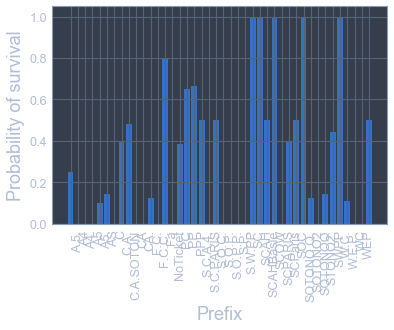

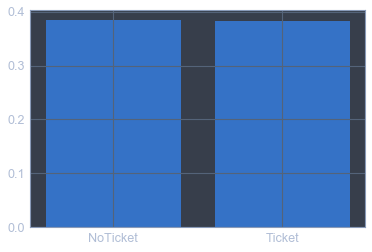

In [14]:
# Ticket, extract prefix to find correlations and binning between ticket and no ticket
combine = [train_df, test_df]

temp1 = []
temp2 = []
temp1T = []
temp2T = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        # Take prefix
        temp1.append(
            ''.join(i.split(' ')[:-1]).replace('/', '').replace(' ', ''))
        temp2.append('Ticket')
    else:
        temp1.append('NoTicket')  # add NoTicket Dummy variable
        temp2.append('NoTicket')

for i in list(test_df.Ticket):
    if not i.isdigit():
        # Take prefix
        temp1T.append(
            ''.join(i.split(' ')[:-1]).replace('/', '').replace(' ', ''))
        temp2T.append('Ticket')
    else:
        temp1T.append('NoTicket')  # add NoTicket Dummy variable
        temp2T.append('NoTicket')

train_df['Ticket'] = temp1
test_df['Ticket'] = temp1T
train_df['TicketBin'] = temp2
test_df['TicketBin'] = temp2T
print(train_df['Ticket'].value_counts(),
      len(train_df['Ticket'].value_counts()))
print(train_df['TicketBin'].value_counts(),
      len(train_df['TicketBin'].value_counts()))
plt.figure()
plt.bar(train_df['Ticket'].value_counts().sort_index().keys(), train_df['Ticket'][train_df['Survived']
                                                                                  == 1].value_counts().sort_index()/train_df['Ticket'].value_counts().sort_index())
plt.xlabel('Prefix', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)
plt.xticks(rotation=90)
plt.figure()
# seems to be a bad idea
plt.bar(train_df['TicketBin'].value_counts().sort_index().keys(), train_df['TicketBin']
        [train_df['Survived'] == 1].value_counts().sort_index()/train_df['TicketBin'].value_counts().sort_index())

Text(0, 0.5, 'Probability of survival')

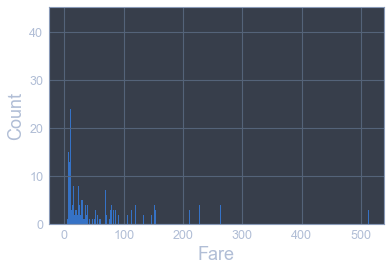

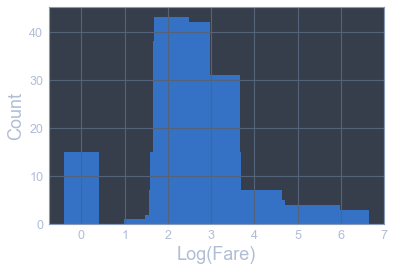

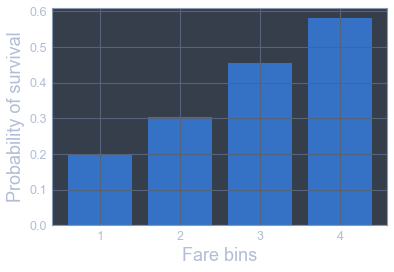

In [15]:
plt.figure()
# no bins
plt.bar(train_df['Fare'].value_counts().sort_index().keys(),
        train_df['Fare'].value_counts().sort_index())
plt.xlabel('Fare', fontsize=18)
plt.ylabel('Count', fontsize=18)
# log
plt.figure()
train_df['FareLog'] = train_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test_df['FareLog'] = test_df['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
plt.bar(train_df['FareLog'].value_counts().sort_index().keys(),
        train_df['FareLog'].value_counts().sort_index())
plt.xlabel('Log(Fare)', fontsize=18)
plt.ylabel('Count', fontsize=18)

# fare bins (4)
train_df['FareBins'] = pd.qcut(train_df['Fare'], 4, labels=[1, 2, 3, 4])
test_df['FareBins'] = pd.qcut(test_df['Fare'], 4, labels=[1, 2, 3, 4])
plt.figure()
plt.bar(train_df['FareBins'].value_counts().sort_index().keys(), train_df['FareBins']
        [train_df['Survived'] == 1].value_counts().sort_index()/train_df['FareBins'].value_counts().sort_index())
plt.xticks(train_df['FareBins'].value_counts().sort_index().keys())
plt.xlabel('Fare bins', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)

Text(0, 0.5, 'Probability of survival')

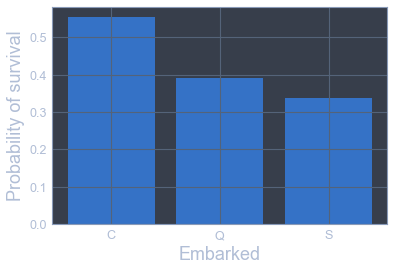

In [16]:
plt.bar(train_df['Embarked'].value_counts().sort_index().keys(), train_df['Embarked']
        [train_df['Survived'] == 1].value_counts().sort_index()/train_df['Embarked'].value_counts().sort_index())
plt.xticks(train_df['Embarked'].value_counts().sort_index().keys())
plt.xlabel('Embarked', fontsize=18)
plt.ylabel('Probability of survival', fontsize=18)

In [17]:
# from previous chapters
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

In [18]:
# pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(['SibSp', 'Parch'])),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
print(num_pipeline.fit_transform(train_df),
      num_pipeline.fit_transform(train_df).shape)

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(
        ['Pclass', 'Sex', 'Embarked', 'Title', 'Fbin', 'Cabin', 'Ticket', 'AgeBins', 'FareBins'])),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore')),
])
print(cat_pipeline.fit_transform(train_df),
      cat_pipeline.fit_transform(train_df).shape)

preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

[[ 0.43279337 -0.47367361]
 [ 0.43279337 -0.47367361]
 [-0.4745452  -0.47367361]
 ...
 [ 0.43279337  2.00893337]
 [-0.4745452  -0.47367361]
 [-0.4745452  -0.47367361]] (891, 2)
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]] (891, 70)


In [19]:
X_train = preprocess_pipeline.fit_transform(train_df)
X_test = preprocess_pipeline.transform(test_df)
y_train = train_df["Survived"]  # check if they survived
scores = pd.DataFrame(columns=['Score', 'Model'])

In [21]:
# softmax
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10, random_state=42, max_iter=300)
print(softmax_reg.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    softmax_reg, X_train, y_train, cv=10).mean(), 'softmax']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'softmax'])
print(softmax_reg.coef_)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
      Score    Model
0  0.822643  softmax
[[-0.07065536  0.03366455  0.23338392  0.13037928 -0.35194067  0.81963651
  -0.80781398  0.09817324  0.07301369 -0.1593644   1.43429207 -0.48867692
  -0.46380008 -0.46999254 -0.95756453  0.2562677   0.46140366  0.2517157
   0.22421401 -0.21239148  1.05810209 -0.56989034 -0.4740601  -0.53882185
   0.53860771 -0.21171785 -0.24001179  0.91068284  0.22137249 -0.5543467
  -1.09686616  0.13568997 -0.98076578  0.65642914 -0.23318719  0.16070543
   0.04369932  0.56689395 -0.15065455 -0.24001179 -0.48939946 -1.11940201
  -0.38038691 -1.66518947 -0.24256719  2.31800425  0.58693692  0.39442421
   0.37668446 -0.5543467   0.20333805 -0.26830274  0.72883937  0.06899179
  -0.3467842   0.62720264

In [22]:
# tree regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
print(tree_reg.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    tree_reg, X_train, y_train, cv=10).mean(), 'tree_reg']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'tree_reg'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
      Score     Model
0  0.345718  tree_reg


In [23]:
# SVC
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
print(svm_clf.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    svm_clf, X_train, y_train, cv=10).mean(), 'SVC']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'SVC'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
      Score Model
0  0.830521   SVC


In [24]:
# RFC
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
print(forest_clf.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    forest_clf, X_train, y_train, cv=10).mean(), 'RFC']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'RFC'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
      Score Model
0  0.821569   RFC


In [26]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(2)
print(knn.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    knn, X_train, y_train, cv=10).mean(), 'KNN']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'KNN'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')
      Score Model
0  0.791255   KNN


In [27]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
print(gnb_clf.fit(X_train, y_train))

scores = pd.concat([scores,  pd.DataFrame([[cross_val_score(
    gnb_clf, X_train, y_train, cv=10).mean(), 'gnb_clf']], columns=['Score', 'Model'])])
print(scores[scores['Model'] == 'gnb_clf'])

GaussianNB(priors=None, var_smoothing=1e-09)
      Score    Model
0  0.449999  gnb_clf


In [28]:
scores.sort_values(by=['Score'], ascending=False)

,Score,Model
0,8.305207e-01,SVC
0,8.226430e-01,softmax
0,8.215688e-01,RFC
0,7.912550e-01,KNN
0,4.499989e-01,gnb_clf
0,3.457178e-01,tree_reg
0,-3.091218e+19,Linear_R


In [29]:
# gridsearch svm
from sklearn.model_selection import GridSearchCV
svm = SVC()
parameters = {'kernel': ('linear', 'rbf'), 'C': (1, 0.75, 1.25, 1.1, 0.9), 'gamma': (
    1, 2, 3, 'auto'), 'decision_function_shape': ('ovo', 'ovr'), 'shrinking': (True, False)}
gs_svm = GridSearchCV(svm, parameters, cv=10, n_jobs=3,  verbose=1)
gs_svm.fit(X_train, y_train)
#print(cross_val_score(gs_svm, X_train, y_train, cv=10).mean())
print(gs_svm.best_params_)
print(gs_svm.best_score_)
print(gs_svm.best_estimator_)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  65 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done 385 tasks      | elapsed:    9.7s
[Parallel(n_jobs=3)]: Done 1385 tasks      | elapsed:   30.3s


{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}
0.8305274971941639
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=3)]: Done 1600 out of 1600 | elapsed:   34.7s finished


In [30]:
params_logreg = [{'penalty': ['l1', 'l2']}, {'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                                        'sag', 'saga']}, {'max_iter': range(100, 1000)}, {'C': (1, 1.25, 1.5, 1.75, 2, 2.25)}]
lreg = LogisticRegression()
gs_lreg = GridSearchCV(lreg, params_logreg, cv=10, n_jobs=3, verbose=1)
gs_lreg.fit(X_train, y_train)
print(gs_lreg.best_params_)
print(gs_lreg.best_score_)
print(gs_lreg.best_estimator_)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 10 folds for each of 913 candidates, totalling 9130 fits


[Parallel(n_jobs=3)]: Done 766 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done 5926 tasks      | elapsed:   10.7s


{'C': 1.5}
0.8316498316498316
LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=3)]: Done 9130 out of 9130 | elapsed:   16.0s finished
C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# RF
params_rfc = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 12, 15, 20],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
              }
rfc = RandomForestClassifier()
gs_rfc = GridSearchCV(rfc, params_rfc, cv=10, n_jobs=3, verbose=1)
gs_rfc.fit(X_train, y_train)
print(gs_rfc.best_params_)
print(gs_rfc.best_score_)
print(gs_rfc.best_estimator_)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 10 folds for each of 1134 candidates, totalling 11340 fits


[Parallel(n_jobs=3)]: Done 1398 tasks      | elapsed:    3.9s
[Parallel(n_jobs=3)]: Done 7698 tasks      | elapsed:   22.7s


{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8372615039281706
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=3)]: Done 11340 out of 11340 | elapsed:   33.9s finished
C:\Users\Kalvyn\Anaconda3\envs\ada_env\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(13, 23), 'weights': ['uniform', 'distance'], 'leaf_size':  range(
    1, 5), 'p': [1, 2, 3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_gs = GridSearchCV(knn, param_knn, cv=10, n_jobs=4, verbose=1)
knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
print(knn_gs.best_score_)
print(knn_gs.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   34.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 2461 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 3311 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 4359 tasks      | elapsed:  5.6min
[Parallel(n_jobs=4)]: Done 5420 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 6470 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done 9593 out of 9600 | elapsed:  9.9min remaining:    0.3s


{'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
0.8316498316498316
KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=1,
           weights='uniform')


[Parallel(n_jobs=4)]: Done 9600 out of 9600 | elapsed:  9.9min finished


In [35]:
pred = knn_gs.predict(X_test)
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": pred
})
submission.to_csv('submission.csv', index=False)